In [1]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow import keras
from tensorflow.keras import layers,Model
from keras.layers import Dense

In [2]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

In [3]:
train_set=train_datagen.flow_from_directory(
'../input/skin-cancer-malignant-vs-benign/train',
target_size=(224,224),
batch_size=128,
class_mode='sparse',
shuffle=True)

Found 2637 images belonging to 2 classes.


In [4]:
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
rescale=1./255)

In [5]:
test_set=test_datagen.flow_from_directory(
'../input/skin-cancer-malignant-vs-benign/test',
target_size=(224,224),
batch_size=128,
class_mode='sparse',
shuffle=True)

Found 660 images belonging to 2 classes.


In [6]:
labels={0:'benign',
        1:'malignant'}

In [7]:
vgg=VGG16(include_top=True,weights='imagenet')

553467904/553467096 [==============================] - 5s 0us/step


In [8]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
for layer in vgg.layers:
    layer.trainable=False

In [10]:
vgg_input=vgg.layers[0].input
vgg_output=vgg.layers[-2].output
prediction=Dense(2)(vgg_output)

In [11]:
model=Model(inputs=vgg_input,outputs=prediction)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:
model.fit(x=train_set,validation_data=test_set,epochs=5)

Epoch 1/5
21/21 [==============================] - 61s 3s/step - loss: 1.0576 - accuracy: 0.4841 - val_loss: 0.6931 - val_accuracy: 0.4545
Epoch 2/5
21/21 [==============================] - 39s 2s/step - loss: 0.6931 - accuracy: 0.4536 - val_loss: 0.6931 - val_accuracy: 0.4545
Epoch 3/5
21/21 [==============================] - 39s 2s/step - loss: 0.6931 - accuracy: 0.4589 - val_loss: 0.6931 - val_accuracy: 0.4545
Epoch 4/5
21/21 [==============================] - 39s 2s/step - loss: 0.6931 - accuracy: 0.4523 - val_loss: 0.6931 - val_accuracy: 0.4545
Epoch 5/5
21/21 [==============================] - 39s 2s/step - loss: 0.6931 - accuracy: 0.4440 - val_loss: 0.6931 - val_accuracy: 0.4545


In [16]:
model_2=keras.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(2,activation='softmax')
])

model_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
model_2.fit(train_set,validation_data=test_set,epochs=5)

Epoch 1/5
21/21 [==============================] - 38s 2s/step - loss: 0.7845 - accuracy: 0.5529 - val_loss: 0.5130 - val_accuracy: 0.6833
Epoch 2/5
21/21 [==============================] - 37s 2s/step - loss: 0.5093 - accuracy: 0.7347 - val_loss: 0.4352 - val_accuracy: 0.7576
Epoch 3/5
21/21 [==============================] - 36s 2s/step - loss: 0.4249 - accuracy: 0.7912 - val_loss: 0.4174 - val_accuracy: 0.7894
Epoch 4/5
21/21 [==============================] - 37s 2s/step - loss: 0.3912 - accuracy: 0.8010 - val_loss: 0.3708 - val_accuracy: 0.8091
Epoch 5/5
21/21 [==============================] - 37s 2s/step - loss: 0.3723 - accuracy: 0.8102 - val_loss: 0.3732 - val_accuracy: 0.8045


In [18]:
def predict(path):
    img = tf.keras.preprocessing.image.load_img(path,target_size=(224,224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    img = np.array([img])
    pred = labels[np.argmax(model_2.predict(img))]
    plt.imshow(img.reshape(224,224,3))
    plt.title(pred)

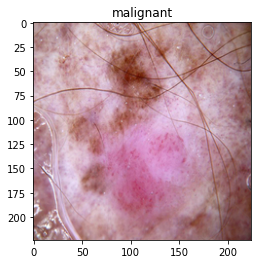

In [19]:
predict('../input/skin-cancer-malignant-vs-benign/test/malignant/1005.jpg')

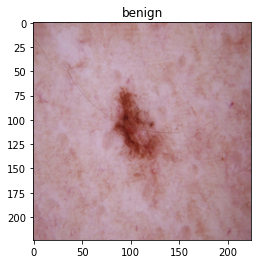

In [20]:
predict('../input/skin-cancer-malignant-vs-benign/test/malignant/1364.jpg')

In [22]:
predict('../input/skin-cancer-malignant-vs-benign/test/benign/1042.jpg')

FileNotFoundError: [Errno 2] No such file or directory: '../input/skin-cancer-malignant-vs-benign/test/benign/1043.jpg'